# Signal Subgraph Proof Notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import random

import graspy

from graspy.subgraph import NonItScreen
from graspy.subgraph import ItScreen

# Screening
screen_MGC = NonItScreen("mgc", 0)
screen_ItMGC50 = ItScreen("mgc", 0.50, 20)
screen_ItMGC05 = ItScreen("mgc", 0.05, 20)

screen_DCORR = NonItScreen("dcorr", 0)
screen_ItDCORR50 = ItScreen("dcorr", 0.50, 20)
screen_ItDCORR05 = ItScreen("dcorr", 0.05, 20)

screen_RV = NonItScreen("rv", 0)

screen_CCA = NonItScreen("cca", 0)

/usr/local/lib/python3.6/dist-packages/numba-0.46.0-py3.6-linux-x86_64.egg/numba/errors.py:137: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


# Accuracy Matching [Paper](https://arxiv.org/abs/1801.07683v1)

## Datagen

In [2]:
# Create function to generate mock data

from graspy.simulations import sbm

def data_generator(num_graphs, N, n, prob_tensor, percent_vec):

    # Getting the number of classes
    num_types = len(percent_vec)

    # Getting vector with the number of graphs in each class
    num = [int(num_graphs * a) for a in percent_vec]

    # Creating blank arrays for all of the returns
    data = np.zeros((num_graphs, N, N))
    y_label = np.zeros((num_graphs, 1))

    # Creates vector of random indices to randomly distribute graphs in tensor
    L_ind = random.sample(range(0, num_graphs), num_graphs)

    # Loop for creating the returns
    for i in range(num_types):

        # Create tensor that will contain all of the graphs of one type
        types = np.zeros((num[i], N, N))

        # Put all the graphs of one type into types
        for j in range(len(types)):
            types[j] = sbm(n=n, p=prob_tensor[i])

        # Assigns all of the graphs in types to random indices in data
        data[L_ind[: num[i]]] = types

        # Creates corresponding labels
        y_label[L_ind[: num[i]]] = int(i)

        # Gets rid of used indices
        L_ind = L_ind[num[i] :]

    return data, y_label

In [3]:
prob_tensor = np.zeros((2, 2, 2))
prob_tensor[0] = [[0.3, 0.2], [0.2, 0.3]]
prob_tensor[1] = [[0.4, 0.2], [0.2, 0.3]]
n = [20, 180]
percent_vec = np.asarray([0.50, 0.50])

#Create signal subgraph label vector, 
#indicating which nodes are in the signal subgraph.

ss_label = np.zeros(200)
ss_label[:20] = 1

Data will be generated 100 times and screened with all methods. The average accuracy and standard deviation of the 
average will be compared with the paper to demonstrate accuracy. The same conditions are used here as in the paper, from 
total number of graphs to proportion of each class type.

# Non-Iterative MGC

In [50]:
import time
from scipy import stats

auc_MGC = np.zeros(0)

start_time = time.time()
for i in range(100): 
    
    data, y_label = data_generator(100, 200, n, prob_tensor, percent_vec)
    
    screen_MGC.fit(data, y_label)
    score = screen_MGC.corrs
    
    tpr, fpr, threshold = metrics.roc_curve(ss_label, score, pos_label=0)
    
    auc_MGC = np.append(auc_MGC, metrics.auc(fpr,tpr))
    
print("--- %s seconds ---" % (time.time() - start_time))

print("Average MGC")
print(np.average(auc_MGC))

print("MGC Standard Error")
print(stats.sem(auc_MGC))

--- 741.065438747406 seconds ---
Average MGC
0.8214972222222222
MGC Standard Error
0.005371033418664609


# Non-Iterative DCORR

In [52]:
import time
from scipy import stats

auc_DCORR = np.zeros(0)

start_time = time.time()
for i in range(100): 
    
    data, y_label = data_generator(100, 200, n, prob_tensor, percent_vec)
    
    screen_DCORR.fit(data, y_label)
    score = screen_DCORR.corrs
    
    tpr, fpr, threshold = metrics.roc_curve(ss_label, score, pos_label=0)
    
    auc_DCORR = np.append(auc_DCORR, metrics.auc(fpr,tpr))
    
print("--- %s seconds ---" % (time.time() - start_time))

print("Average DCORR")
print(np.average(auc_DCORR))

print("DCORR Standard Error")
print(stats.sem(auc_DCORR))

--- 45.302879333496094 seconds ---
Average DCORR
0.8144055555555555
DCORR Standard Error
0.005838290902817231


# Non-Iterative RV

In [53]:
import time
from scipy import stats

auc_RV = np.zeros(0)

start_time = time.time()
for i in range(100): 
    
    data, y_label = data_generator(100, 200, n, prob_tensor, percent_vec)
    
    screen_RV.fit(data, y_label)
    score = screen_RV.corrs
    
    tpr, fpr, threshold = metrics.roc_curve(ss_label, score, pos_label=0)
    
    auc_RV = np.append(auc_RV, metrics.auc(fpr,tpr))
    
print("--- %s seconds ---" % (time.time() - start_time))

print("Average RV")
print(np.average(auc_RV))

print("RV Standard Error")
print(stats.sem(auc_RV))

--- 62.18116092681885 seconds ---
Average RV
0.809425
RV Standard Error
0.005859599960244853


# Non-Iterative CCA

In [54]:
import time
from scipy import stats

auc_CCA = np.zeros(0)

start_time = time.time()
for i in range(100): 
    
    data, y_label = data_generator(100, 200, n, prob_tensor, percent_vec)
    
    screen_CCA.fit(data, y_label)
    score = screen_CCA.corrs
    
    tpr, fpr, threshold = metrics.roc_curve(ss_label, score, pos_label=0)
    
    auc_CCA = np.append(auc_CCA, metrics.auc(fpr,tpr))
    
print("--- %s seconds ---" % (time.time() - start_time))

print("Average CCA")
print(np.average(auc_CCA))

print("CCA Standard Error")
print(stats.sem(auc_CCA))

--- 51.92454409599304 seconds ---
Average CCA
0.8156916666666666
CCA Standard Error
0.0058700988463371555


# Iterative MGC with 0.50

In [58]:
import time
from scipy import stats

auc_ItMGC_50 = np.zeros(0)

start_time = time.time()
for i in range(100): 
    
    data, y_label = data_generator(100, 200, n, prob_tensor, percent_vec)
    
    screen_ItMGC50.fit(data, y_label)
    score = screen_ItMGC50.corrs
    
    tpr, fpr, threshold = metrics.roc_curve(ss_label, score, pos_label=0)
    
    auc_ItMGC_50 = np.append(auc_ItMGC_50, metrics.auc(fpr,tpr))
    
print("--- %s seconds ---" % (time.time() - start_time))

print("Average ItMGC-0.50")
print(np.average(auc_ItMGC_50))

print("ItMGC-0.50 Standard Error")
print(stats.sem(auc_ItMGC_50))

--- 3085.776354789734 seconds ---
Average ItMGC-0.50
0.8347722222222221
ItMGC-0.50 Standard Error
0.006852687159021188


# Iterative MGC with 0.05

In [63]:
import time
from scipy import stats

auc_ItMGC_05 = np.zeros(0)

start_time = time.time()
for i in range(100): 
    
    data, y_label = data_generator(100, 200, n, prob_tensor, percent_vec)
    
    screen_ItMGC05.fit(data, y_label)
    score = screen_ItMGC05.corrs
    
    tpr, fpr, threshold = metrics.roc_curve(ss_label, score, pos_label=0)
    
    auc_ItMGC_05 = np.append(auc_ItMGC_05, metrics.auc(fpr,tpr))
    
print("--- %s seconds ---" % (time.time() - start_time))

print("Average ItMGC-0.05")
print(np.average(auc_ItMGC_05))

print("ItMGC-0.05 Standard Error")
print(stats.sem(auc_ItMGC_05))

--- 24135.199751377106 seconds ---
Average ItMGC-0.05
0.8393944444444443
ItMGC-0.05 Standard Error
0.006344786761960167


# Iterative DCORR with 0.50

In [59]:
import time
from scipy import stats

auc_ItDCORR_50 = np.zeros(0)

start_time = time.time()
for i in range(100): 
    
    data, y_label = data_generator(100, 200, n, prob_tensor, percent_vec)
    
    screen_ItDCORR50.fit(data, y_label)
    score = screen_ItDCORR50.corrs
    
    tpr, fpr, threshold = metrics.roc_curve(ss_label, score, pos_label=0)
    
    auc_ItDCORR_50 = np.append(auc_ItDCORR_50, metrics.auc(fpr,tpr))
    
print("--- %s seconds ---" % (time.time() - start_time))

print("Average ItDCORR-0.50")
print(np.average(auc_ItDCORR_50))

print("ItDCORR-0.50 Standard Error")
print(stats.sem(auc_ItDCORR_50))

--- 142.10316157341003 seconds ---
Average ItDCORR-0.50
0.8308000000000001
ItDCORR-0.50 Standard Error
0.006913105808837304


# Iterative DCORR with 0.05

In [99]:
import time
from scipy import stats

auc_ItDCORR_05 = np.zeros(0)

start_time = time.time()
for i in range(100): 
    
    data, y_label = data_generator(100, 200, n, prob_tensor, percent_vec)
    
    screen_ItDCORR05.fit(data, y_label)
    score = screen_ItDCORR05.corrs
    
    tpr, fpr, threshold = metrics.roc_curve(ss_label, score, pos_label=0)
    
    auc_ItDCORR_05 = np.append(auc_ItDCORR_05, metrics.auc(fpr,tpr))
    
print("--- %s seconds ---" % (time.time() - start_time))

print("Average ItDCORR-0.05")
print(np.average(auc_ItDCORR_05))

print("ItDCORR-0.05 Standard Error")
print(stats.sem(auc_ItDCORR_05))

--- 690.7410480976105 seconds ---
Average ItDCORR-0.05
0.830577777777778
ItDCORR-0.05 Standard Error
0.008041025325809545


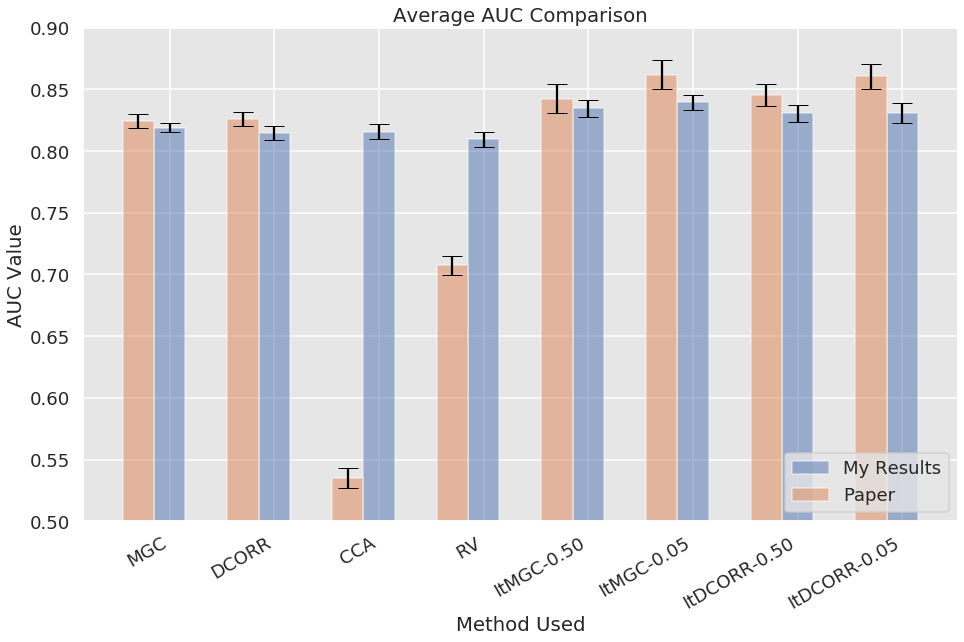

<Figure size 8000x8000 with 0 Axes>

In [100]:
import seaborn as sns
%matplotlib inline

plt.close('all')

objects = ('MGC', 'DCORR', 'CCA', 'RV', 'ItMGC-0.50', 'ItMGC-0.05', 'ItDCORR-0.50', 'ItDCORR-0.05')
x_pos = np.arange(len(objects))
means = [np.average(auc_MGC),np.average(auc_DCORR),np.average(auc_CCA),np.average(auc_RV),np.average(auc_ItMGC_50),np.average(auc_ItMGC_05),np.average(auc_ItDCORR_50),np.average(auc_ItDCORR_05)]
pap_means = [0.8241,0.8262,0.5353,0.7074,0.8425,0.8620,0.8455,0.8605]
errs = [stats.sem(auc_MGC),stats.sem(auc_DCORR),stats.sem(auc_CCA),stats.sem(auc_RV),stats.sem(auc_ItMGC_50),stats.sem(auc_ItMGC_05),stats.sem(auc_ItDCORR_50),stats.sem(auc_ItDCORR_05)]
pap_errs = [0.0057,0.0056,0.0080,0.0077,0.0120,0.0116,0.0091,0.0103]
w = 0.3

sns.set()
sns.set_context("talk", font_scale=1.10)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
fig, ax = plt.subplots(1,1)
ax.bar(x_pos, means, yerr=errs, align='center', alpha=0.5, ecolor='black', capsize=10, width=0.3)
ax.bar(x_pos - w, pap_means, yerr=pap_errs, align='center', alpha=0.5, ecolor='black', capsize=10, width=0.3)
ax.set_ylabel('AUC Value')
ax.set_xticks(x_pos)
ax.set_xticklabels(objects)
ax.set_xlabel('Method Used')
ax.set_title('Average AUC Comparison')
ax.set_yticks([0.50, 0.55, 0.60, 0.65, 0.70, 0.75, 0.80, 0.85, 0.90], minor=True)
ax.yaxis.grid(True)
plt.ylim(top=0.90)
plt.ylim(bottom=0.50)
plt.tight_layout()
fig.autofmt_xdate()
Source=['My Results','Paper']
plt.legend(Source,loc=4)
plt.figure(num=None, figsize=(80, 80), dpi=100, facecolor='w', edgecolor='k')
fig.set_size_inches(18.5, 10.5, forward=True)
